In [1]:
from MyDataset import TGS_Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
import cv2
import PIL.Image as Image
warnings.filterwarnings("ignore")
print('load finish')

load finish


In [3]:
# in order to fetch out first 6*12 pictures in training set and display them together in a big picture
TRAIN_PATH = './Data/train'
train_dataset = TGS_Dataset(TRAIN_PATH)
df = train_dataset.df
image = []
mask = []
for i in range(100):
    image.append(cv2.imread(df.img_path[i]))
    mask.append(cv2.imread(df.mask_path[i]))

IMAGE_COLUMN = 12
IMAGE_ROW = 6
IMAGE_SIZE = 101
to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))
to_mask = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))

to_image = np.array(to_image)
to_mask = np.array(to_mask)

for i in range(6):
    for j in range(12):
        to_image[i*101:(i+1)*101, j*101:(j+1)*101, :] = image[12*i+j]
        to_mask[i*101:(i+1)*101, j*101:(j+1)*101, :] = mask[12*i+j]
print(to_image.shape)
print(to_mask.shape)

1562 empty masks out of 4000 total masks
(606, 1212, 3)
(606, 1212, 3)


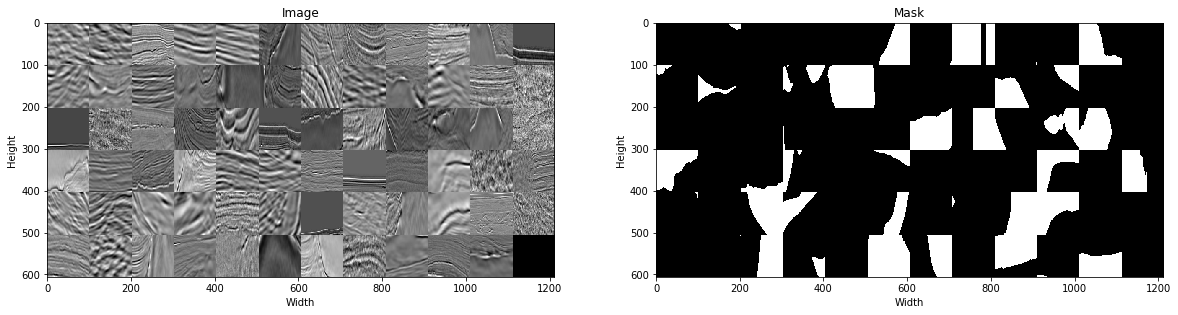

In [4]:
# display the big picture and its mask information
f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].set_title('Image')
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Height')
ax[1].set_title('Mask')
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Height')
ax[0].imshow(to_image)
ax[1].imshow(to_mask)